In [1]:
#!pip install kaggle

# DL kaggle.json

In [2]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d subham07/detecting-anomalies-in-water-manufacturing

  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 61.3MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('/content/detecting-anomalies-in-water-manufacturing.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/detecting-anomalies-in-water-manufacturing')

# Data cleaning

In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('/content/detecting-anomalies-in-water-manufacturing/Train.csv', low_memory=False)

In [26]:
df.sample(3)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,feature_342,fea

In [27]:
df.shape

(1763, 1559)

In [28]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_1550', 'feature_1551', 'feature_1552', 'feature_1553',
       'feature_1554', 'feature_1555', 'feature_1556', 'feature_1557',
       'feature_1558', 'Class'],
      dtype='object', length=1559)

In [64]:
train_data=np.var(df, axis=0)

train_name=[]
for i in train_data.iteritems():
    if(i[1]==0):
        train_name.append(i[0])
        #print(i)

<ipython-input-64-8d759f595fd5>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i in train_data.iteritems():


In [65]:
train_name

[]

In [29]:
# Calculate the percentage of missing values in df_read
percentage_missing = df.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,feature_342,fea

In [30]:
# Keep features with less than 20% missing values
features_to_keep = df.columns[ (df.isnull().sum()/len(df))*100 <20 ].tolist()

print('Features at start:',len(df.columns))
print('Features after filtering:',len(features_to_keep))

Features at start: 1559
Features after filtering: 1559


In [31]:
df["Class"].value_counts()

0    1620
1     143
Name: Class, dtype: int64

In [32]:
df.shape

(1763, 1559)

In [33]:
df = df.drop_duplicates()

In [34]:
df.shape

(1715, 1559)

In [35]:
train_data=np.var(df, axis=0)

train_name=[]
for i in train_data.items():
    if(i[1]==0):
        train_name.append(i[0])
        #print(i)
print(train_name)

['feature_57', 'feature_82', 'feature_106', 'feature_147', 'feature_262', 'feature_278', 'feature_284', 'feature_320', 'feature_362', 'feature_372', 'feature_383', 'feature_435', 'feature_439', 'feature_488', 'feature_495', 'feature_522', 'feature_531', 'feature_553', 'feature_578', 'feature_591', 'feature_630', 'feature_631', 'feature_652', 'feature_894', 'feature_934', 'feature_978', 'feature_1038', 'feature_1063', 'feature_1096', 'feature_1185', 'feature_1211', 'feature_1243', 'feature_1247', 'feature_1341', 'feature_1367', 'feature_1407']


In [36]:
df.drop(train_name,axis=1, inplace=True)

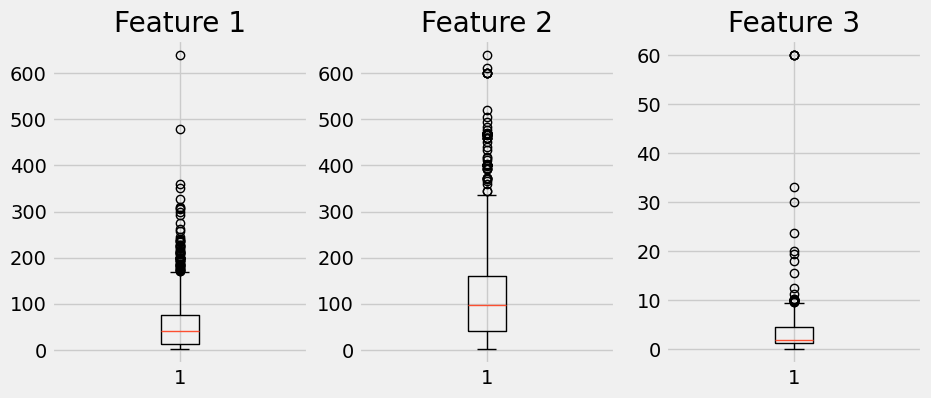

In [37]:
from matplotlib import pyplot as plt

fig, axs =  plt.subplots(1,3,figsize = (10,4))

plt.style.use("fivethirtyeight")

for i in range(3):
    axs[i].set_title(f'Feature {i+1}')
    axs[i].boxplot(df[f'feature_{i+1}'])

In [38]:
from scipy.stats.mstats import winsorize

for col in df.columns[:3]:
    l=0.1 if col=='feature_2' else 0.05
    df[col]=winsorize(df[col],limits=l)

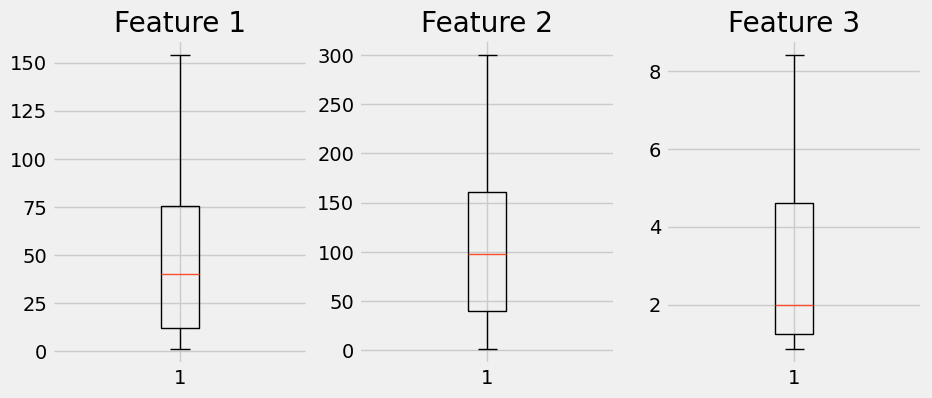

In [39]:
fig, axs =  plt.subplots(1,3,figsize = (10,4))

plt.style.use("fivethirtyeight")

for i in range(3):
    axs[i].set_title(f'Feature {i+1}')
    axs[i].boxplot(df[f'feature_{i+1}'])

In [40]:

# Assuming your data is stored in a NumPy array called 'data' with shape (n_samples, 2000)

# Calculate z-scores for each feature
z_scores = np.abs((df - np.mean(df, axis=0)) / np.std(df, axis=0))

# Set the threshold for outlier detection
threshold = 50  # Adjust this value according to your requirements

# Find outlier indices for each feature
outlier_indices = np.where(z_scores > threshold)

# Combine outlier indices across features
outliers = np.unique(outlier_indices[0])

# Print the indices of detected outliers
print("Indices of detected outliers:", outliers)

Indices of detected outliers: []


<ipython-input-41-359dfc140bf0>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


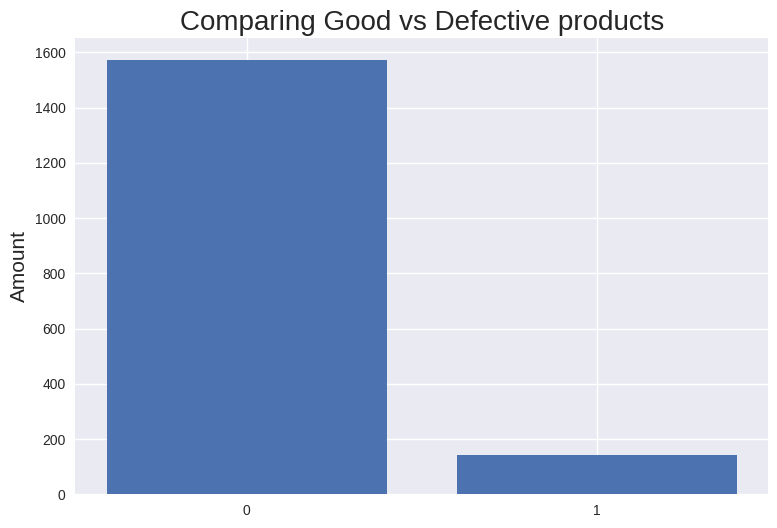

In [41]:
from matplotlib import pyplot as plt

# Data distribution

Defaulters_index = df['Class'].value_counts().index.tolist()
Defaulters_amount = df['Class'].value_counts().tolist()

Defaulters_index.reverse()
Defaulters_amount.reverse()

plt.style.use('seaborn')

plt.bar(Defaulters_index[-15:],Defaulters_amount[-15:])

ind_list=['Good products','Defect Product']

plt.title('Comparing Good vs Defective products',fontsize=20)
plt.ylabel('Amount',fontsize=15)
plt.xlabel
plt.xticks(Defaulters_index)
plt.tight_layout()

plt.show()

# Process

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder

In [50]:
df_model = df.copy()

In [51]:
categorical_features = [features for features in df_model.columns if df_model[features].dtype == "object"]
numerical_features = [features for features in df_model.columns if features not in categorical_features]

print('Categorical Features:',categorical_features)
print('Numerical Features:',numerical_features)

Categorical Features: []
Numerical Features: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_70

In [52]:
numerical_features.remove("Class")

In [53]:
X = df_model.drop(['Class'],axis=1)
y = df_model['Class']

In [54]:
X.head(2)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_279,feature_280,feature_281,feature_282,feature_283,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,feature_342,feature_343,feature_344,feature_345,feature_346,feature_347,feature_348,feature_349,feature_350,f

In [55]:
scaler = StandardScaler()

#X[numerical_features] = scaler.fit_transform(X[numerical_features])
X[['feature_1','feature_2','feature_3']] = scaler.fit_transform(X[['feature_1','feature_2','feature_3']])

In [56]:
X.head(2)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_279,feature_280,feature_281,feature_282,feature_283,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,feature_342,feature_343,feature_344,feature_345,feature_346,feature_347,feature_348,feature_349,feature_350,f

In [57]:
y.value_counts()

0    1572
1     143
Name: Class, dtype: int64

In [58]:
X.shape

(1715, 1522)

In [60]:
# TRAIN VAL TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,shuffle=True,stratify=y,random_state=42)

#print('y unique values before oversampling:',y_train.value_counts())
#print('Train before resample:',X_train.shape,y_train.shape)

# OVER SAMPLING
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train,y_train = smote.fit_resample(X_train,y_train)
#print("Train after resample:",X_train.shape,y_train.shape)
#print(y_train.value_counts())

X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)


print("X_train.shape", X_train_re.shape, "y_train.shape", y_train_re.shape)
print("X_valid.shape", X_valid_re.shape, "y_valid.shape", y_valid_re.shape)
print("X_test.shape", X_test.shape," y_test.shape",y_test.shape)
#print("X_train_re.shape", X_train_re.shape, "y_train_re.shape", y_train_re.shape)

X_train.shape (2545, 1522) y_train.shape (2545,)
X_valid.shape (283, 1522) y_valid.shape (283,)
X_test.shape (172, 1522)  y_test.shape (172,)


# Models

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

## SVM (Final)

In [62]:
import sklearn.svm

listt=[0.001,0.01,0.03,0.05,0.1,0.3,0.5,1,3,10]
listt_index=["0.001","0.01","0.03","0.05","0.1","0.3","0.5","1","3","10"]

train_perf_hist_svm = []
valid_perf_hist_svm =[]
test_perf_hist_svm =[]

for i in listt:

  svm_model = sklearn.svm.SVC(C=i,kernel='rbf',random_state=40)
  svm_model.fit(X_train_re,y_train_re)

  y_pred_train_svm = svm_model.predict(X_train_re)
  y_pred_valid_svm = svm_model.predict(X_valid_re)
  y_pred_test_svm = svm_model.predict(X_test)

  print('----------C={}-------------'.format(i))
  print('Accuracy on Train:', accuracy_score(y_train_re,y_pred_train_svm))
  print('Accuracy on Valid:', accuracy_score(y_valid_re,y_pred_valid_svm))
  #print('-----------')
  print('F1 Score on Train:',f1_score(y_train_re,y_pred_train_svm,average='macro'))
  print('F1 Score on Valid:',f1_score(y_valid_re,y_pred_valid_svm,average='macro'))

  train_perf_hist_svm.append(f1_score(y_train_re,y_pred_train_svm,average='macro'))
  valid_perf_hist_svm.append(f1_score(y_valid_re,y_pred_valid_svm,average='macro'))
  test_perf_hist_svm.append(f1_score(y_test,y_pred_test_svm,average='macro'))



----------C=0.001-------------
Accuracy on Train: 0.500196463654224
Accuracy on Valid: 0.49823321554770317
F1 Score on Train: 0.33342063907805136
F1 Score on Valid: 0.33254716981132076
----------C=0.01-------------
Accuracy on Train: 0.7697445972495088
Accuracy on Valid: 0.7420494699646644
F1 Score on Train: 0.7629458881394899
F1 Score on Valid: 0.733738029875369
----------C=0.03-------------
Accuracy on Train: 0.8070726915520628
Accuracy on Valid: 0.784452296819788
F1 Score on Train: 0.8033535158017318
F1 Score on Valid: 0.7795978295563357
----------C=0.05-------------
Accuracy on Train: 0.8259332023575638
Accuracy on Valid: 0.7915194346289752
F1 Score on Train: 0.8235134632943976
F1 Score on Valid: 0.7884661675091533
----------C=0.1-------------
Accuracy on Train: 0.844007858546169
Accuracy on Valid: 0.7985865724381626
F1 Score on Train: 0.8425845385677346
F1 Score on Valid: 0.7959779927907418
----------C=0.3-------------
Accuracy on Train: 0.9041257367387033
Accuracy on Valid: 0.862

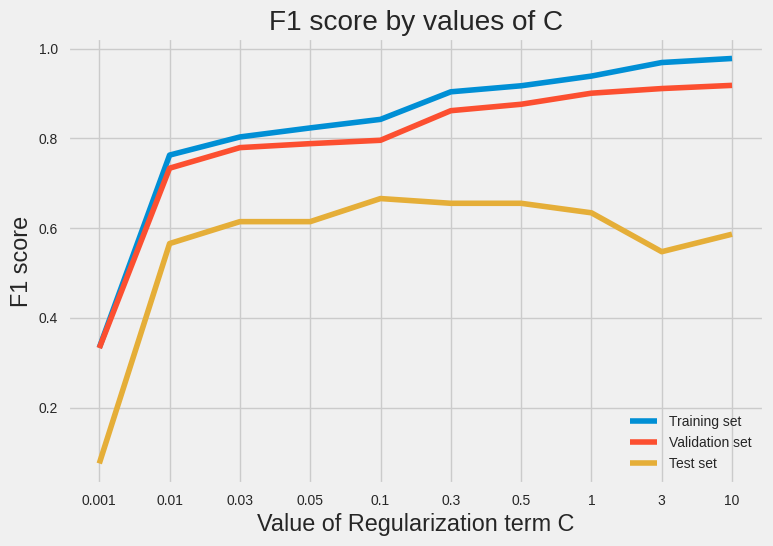

In [63]:
plt.style.use("fivethirtyeight")

plt.plot(listt_index,train_perf_hist_svm,label='Training set')#
plt.plot(listt_index,valid_perf_hist_svm,label='Validation set')
plt.plot(listt_index,test_perf_hist_svm,label='Test set')
plt.xlabel('Value of Regularization term C')
plt.ylabel('F1 score')
plt.legend(loc='lower right')
plt.title('F1 score by values of C')

plt.show()

In [66]:
svm_model = sklearn.svm.SVC(C=0.1,kernel='rbf',random_state=40)
svm_model.fit(X_train_re,y_train_re)

y_pred_train_svm = svm_model.predict(X_train_re)
y_pred_valid_svm = svm_model.predict(X_valid_re)

print('Accuracy on Train:', accuracy_score(y_train_re,y_pred_train_svm))
print('Accuracy on Valid:', accuracy_score(y_valid_re,y_pred_valid_svm))
print('-----------')
print('F1 Score on Train:',f1_score(y_train_re,y_pred_train_svm,average='macro'))
print('F1 Score on Valid:',f1_score(y_valid_re,y_pred_valid_svm,average='macro'))

Accuracy on Train: 0.844007858546169
Accuracy on Valid: 0.7985865724381626
-----------
F1 Score on Train: 0.8425845385677346
F1 Score on Valid: 0.7959779927907418


In [67]:
y_pred_test_svm = svm_model.predict(X_test)

print('F1 Score on Test:',f1_score(y_test,y_pred_test_svm,average='macro'))

F1 Score on Test: 0.6660194174757281


In [68]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_test_svm,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_test_svm)
print(report)

Confusion Matrix: [[144  14]
 [  7   7]]
---------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       158
           1       0.33      0.50      0.40        14

    accuracy                           0.88       172
   macro avg       0.64      0.71      0.67       172
weighted avg       0.90      0.88      0.89       172



[Text(0.5, 9.222222222222195, 'Predictions'),
 Text(34.72222222222222, 0.5, 'Actual values')]

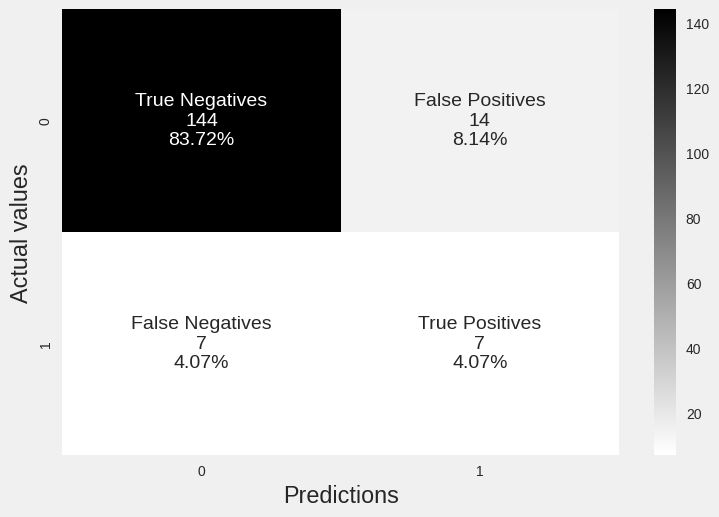

In [70]:
import seaborn as sns

group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten() / np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='binary')
ax.set(xlabel="Predictions",ylabel="Actual values")

## DFO - SVM (Final)

In [75]:
import numpy as np
import sklearn.svm

# FITNESS FUNCTION (SPHERE FUNCTION)
# FITNESS FUNCTION TO CALCULATE THE ACCURACY OF SELECTED FEW FEATURE BASED ON THE VECTOR X

def f(x):

  # GET THE SUBSET OF FEATURE BASED ON THE FLY VECTOR VALUES (TAKE FEATURES IF VALUE>=0.5)
  features_list = []

  for i in range(len(x)):
    if x[i]>=(0.5):
      features_list.append(X.columns[i])

  X_dfo = X.copy()
  X_dfo = X_dfo.loc[:, features_list]

  y_dfo = y.copy()


  # TRAIN VAL TEST SPLIT
  X_train,X_test,y_train,y_test=train_test_split(X_dfo,y_dfo,test_size=0.1,shuffle=True,stratify=y,random_state=42)

  # OVER SAMPLING
  from imblearn.over_sampling import SMOTE
  smote = SMOTE(sampling_strategy='minority')
  X_train,y_train = smote.fit_resample(X_train,y_train)

  X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)



  #########################   SVM
  svm_model = sklearn.svm.SVC(C=0.1,kernel='rbf',random_state=40)
  svm_model.fit(X_train_re,y_train_re)


  y_pred_test_svm = svm_model.predict(X_test)

  test_F1 = f1_score(y_test,y_pred_test_svm,average='macro')



  return test_F1

N = 20					# POPULATION SIZE
D = X.shape[1]		# DIMENSIONALITY
delta = 0.01			# DISTURBANCE THRESHOLD
maxIterations = 50	# ITERATIONS ALLOWED
lowerB = [-1]*D		# LOWER BOUND (IN ALL DIMENSIONS)
upperB = [1]*D		# UPPER BOUND (IN ALL DIMENSIONS)

historyy = []
feature_history = []



# INITIALISATION PHASE
XX = np.empty([N,D]) # EMPTY FLIES ARRAY OF SIZE: (N,D)
fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

# INITIALISE FLIES WITHIN BOUNDS
for i in range(N):
	for d in range(D):
		XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

# MAIN DFO LOOP
for itr in range (maxIterations):
	for i in range(N): # EVALUATION
		fitness[i] = f(XX[i,])
	s = np.argmax(fitness) # FIND BEST FLY

	#if (itr%10 == 0): # PRINT BEST FLY EVERY 10 ITERATIONS
	print ("Iteration:", itr, "\tBest fly index:", s,
			   "\tFitness value (Test F1 - KNN):", fitness[s])



	historyy.append(fitness[s])

  # Condition for counting elements between 0 and 1 (inclusive) that are greater than 0.5
	condition = lambda x: 0.5 <= x <= 1

	# Using list comprehension to count elements that satisfy the condition
	count = len([element for element in XX[s,] if condition(element)])

	# Save the subset of features at each iterations
	feature_history.append(count)



	# TAKE EACH FLY INDIVIDUALLY
	for i in range(N):
		if i == s: continue # ELITIST STRATEGY

		# FIND BEST NEIGHBOUR
		left = (i-1)%N
		right = (i+1)%N
		bNeighbour = right if fitness[right]>fitness[left] else left

		for d in range(D): # UPDATE EACH DIMENSION SEPARATELY
			if (np.random.rand() < delta):
				XX[i,d] = np.random.uniform(lowerB[d], upperB[d])
				continue;

			u = np.random.rand()
			XX[i,d] = XX[bNeighbour,d] + u*(XX[s,d] - XX[i,d])

			# OUT OF BOUND CONTROL
			if XX[i,d] < lowerB[d] or XX[i,d] > upperB[d]:
				XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

for i in range(N):
	fitness[i] = f(XX[i,]) # EVALUATION
s = np.argmax(fitness) # FIND BEST FLY

print("\nFinal best fitness:\t", fitness[s])
print("\nBest fly position:\n",  XX[s,])

Iteration: 0 	Best fly index: 1 	Fitness value (Test F1 - KNN): 0.6815583997424133
Iteration: 1 	Best fly index: 18 	Fitness value (Test F1 - KNN): 0.7207792207792207
Iteration: 2 	Best fly index: 18 	Fitness value (Test F1 - KNN): 0.7122986178360772
Iteration: 3 	Best fly index: 10 	Fitness value (Test F1 - KNN): 0.7207792207792207
Iteration: 4 	Best fly index: 10 	Fitness value (Test F1 - KNN): 0.7296347665279705
Iteration: 5 	Best fly index: 9 	Fitness value (Test F1 - KNN): 0.7388994307400379
Iteration: 6 	Best fly index: 9 	Fitness value (Test F1 - KNN): 0.7296347665279705
Iteration: 7 	Best fly index: 9 	Fitness value (Test F1 - KNN): 0.7388994307400379
Iteration: 8 	Best fly index: 10 	Fitness value (Test F1 - KNN): 0.7150930527136314
Iteration: 9 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.7296347665279705
Iteration: 10 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.7296347665279705
Iteration: 11 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.72963476652797

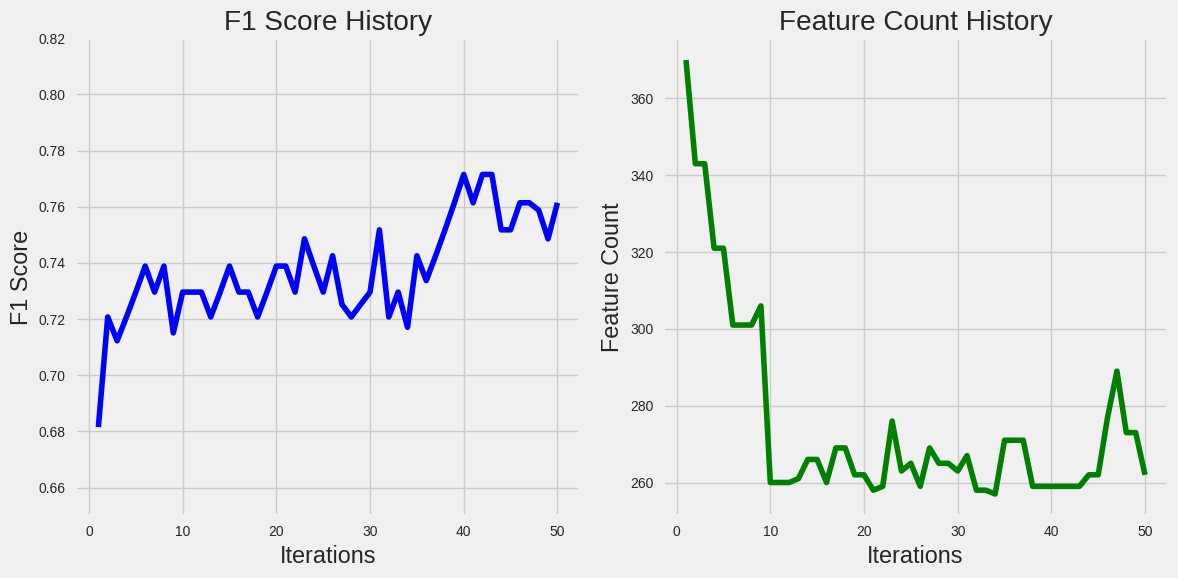

In [76]:
plt.style.use("fivethirtyeight")

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the accuracy data on the first subplot (ax1)
ax1.plot(range(1, len(historyy) + 1), historyy, color='blue', linestyle='-')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('F1 Score')
ax1.set_title('F1 Score History')
ax1.set_ylim(0.65, 0.82)  # Set the y-axis limits between 0.7 and 1.0

# Plot the feature count data on the second subplot (ax2)
ax2.plot(range(1, len(feature_history) + 1), feature_history, color='green',  linestyle='-')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Feature Count')
ax2.set_title('Feature Count History')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the subplots
plt.show()

In [ ]:
import numpy as np
import sklearn.svm
# FITNESS FUNCTION (SPHERE FUNCTION)
# FITNESS FUNCTION TO CALCULATE THE ACCURACY OF SELECTED FEW FEATURE BASED ON THE VECTOR X

def f(x):

  # GET THE SUBSET OF FEATURE BASED ON THE FLY VECTOR VALUES (TAKE FEATURES IF VALUE>=0.5)
  features_list = []

  for i in range(len(x)):
    if x[i]>=(0.5):
      features_list.append(X.columns[i])

  X_dfo = X.copy()
  X_dfo = X_dfo.loc[:, features_list]

  y_dfo = y.copy()


  # TRAIN VAL TEST SPLIT
  X_train,X_test,y_train,y_test=train_test_split(X_dfo,y_dfo,test_size=0.1,shuffle=True,stratify=y,random_state=42)

  # OVER SAMPLING
  from imblearn.over_sampling import SMOTE
  smote = SMOTE(sampling_strategy='minority')
  X_train,y_train = smote.fit_resample(X_train,y_train)

  X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)



  #########################   SVM
  svm_model = sklearn.svm.SVC(C=0.1,kernel='rbf',random_state=40)
  svm_model.fit(X_train_re,y_train_re)


  y_pred_test_svm = svm_model.predict(X_test)

  test_F1 = f1_score(y_test,y_pred_test_svm,average='macro')



  return test_F1


delta_values = [0.1,0.01,0.001,0.0001]
historyy = []

convergence_results = np.zeros((len(delta_values), 40))

for num,delt in enumerate(delta_values):

  N = 20					# POPULATION SIZE
  D = X.shape[1]					# DIMENSIONALITY
  delta = delt			# DISTURBANCE THRESHOLD
  maxIterations = 40	# ITERATIONS ALLOWED
  lowerB = [-1]*D		# LOWER BOUND (IN ALL DIMENSIONS)
  upperB = [1]*D		# UPPER BOUND (IN ALL DIMENSIONS)





  # INITIALISATION PHASE
  XX = np.empty([N,D]) # EMPTY FLIES ARRAY OF SIZE: (N,D)
  fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

  # INITIALISE FLIES WITHIN BOUNDS
  for i in range(N):
    for d in range(D):
      XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

  # MAIN DFO LOOP
  for itr in range (maxIterations):
    for i in range(N): # EVALUATION
      fitness[i] = f(XX[i,])
    s = np.argmax(fitness) # FIND BEST FLY

    #if (itr%10 == 0): # PRINT BEST FLY EVERY 10 ITERATIONS
    print ("Iteration:", itr, "\tBest fly index:", s,
          "\tFitness value (Test F1 - KNN):", fitness[s])

    convergence_results[num, itr] = fitness[s]






    # TAKE EACH FLY INDIVIDUALLY
    for i in range(N):
      if i == s: continue # ELITIST STRATEGY

      # FIND BEST NEIGHBOUR
      left = (i-1)%N
      right = (i+1)%N
      bNeighbour = right if fitness[right]>fitness[left] else left

      for d in range(D): # UPDATE EACH DIMENSION SEPARATELY
        if (np.random.rand() < delta):
          XX[i,d] = np.random.uniform(lowerB[d], upperB[d])
          continue;

        u = np.random.rand()
        XX[i,d] = XX[bNeighbour,d] + u*(XX[s,d] - XX[i,d])

        # OUT OF BOUND CONTROL
        if XX[i,d] < lowerB[d] or XX[i,d] > upperB[d]:
          XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

  for i in range(N):
    fitness[i] = f(XX[i,]) # EVALUATION
  s = np.argmax(fitness) # FIND BEST FLY

  print('----------------Disturbance set to {}--------------------------'.format(delt))
  print("\nFinal best fitness:\t", fitness[s])
  print("\nBest fly position:\n",  XX[s,])
  historyy.append(fitness[s])

Iteration: 0 	Best fly index: 7 	Fitness value (Test F1 - KNN): 0.6888157894736842
Iteration: 1 	Best fly index: 7 	Fitness value (Test F1 - KNN): 0.6888157894736842
Iteration: 2 	Best fly index: 7 	Fitness value (Test F1 - KNN): 0.6888157894736842
Iteration: 3 	Best fly index: 13 	Fitness value (Test F1 - KNN): 0.6978270920018492
Iteration: 4 	Best fly index: 13 	Fitness value (Test F1 - KNN): 0.7150930527136314
Iteration: 5 	Best fly index: 13 	Fitness value (Test F1 - KNN): 0.6978270920018492
Iteration: 6 	Best fly index: 2 	Fitness value (Test F1 - KNN): 0.7296347665279705
Iteration: 7 	Best fly index: 2 	Fitness value (Test F1 - KNN): 0.7207792207792207
Iteration: 8 	Best fly index: 12 	Fitness value (Test F1 - KNN): 0.7296347665279705
Iteration: 9 	Best fly index: 13 	Fitness value (Test F1 - KNN): 0.7122986178360772
Iteration: 10 	Best fly index: 12 	Fitness value (Test F1 - KNN): 0.7122986178360772
Iteration: 11 	Best fly index: 12 	Fitness value (Test F1 - KNN): 0.712298617836

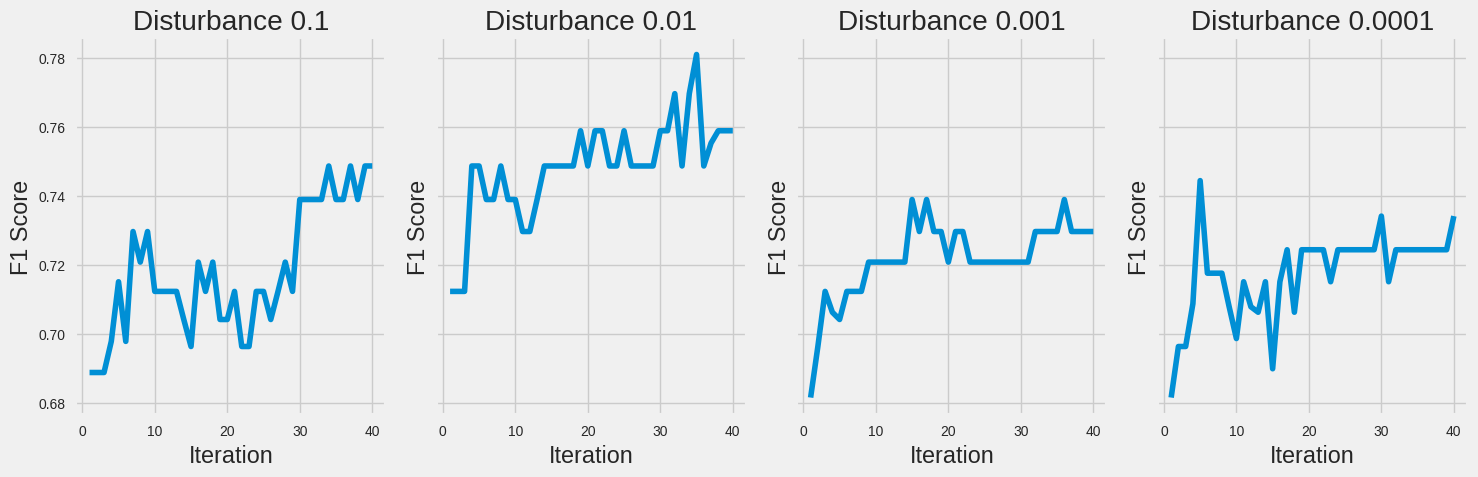

In [ ]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

# Create subplots
fig, axs = plt.subplots(1, len(delta_values), figsize=(15, 5), sharey=True)

# Plot convergence graphs for each disturbance index separately
for k,disturbance_index in enumerate(delta_values):
    axs[k].plot(range(1, maxIterations + 1), convergence_results[k, :])
    axs[k].set_xlabel('Iteration')
    axs[k].set_ylabel('F1 Score')
    axs[k].set_title(f'Disturbance {disturbance_index}')
    axs[k].grid()

    axs[k].grid(True)


plt.setp(axs, ylabel='F1 Score')
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

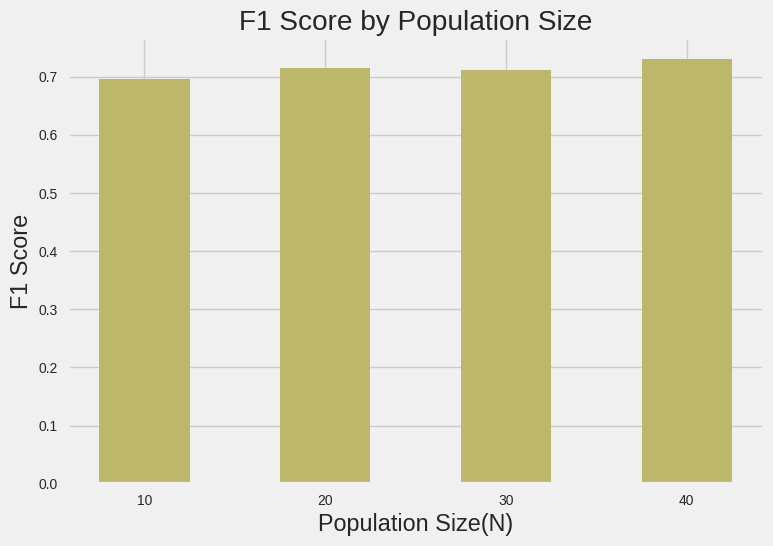

In [ ]:
plt.style.use("fivethirtyeight")

# Create the bar plot
plt.bar(range(len(pop_values)), historyy, color='darkkhaki', width=0.5)  # Adjust the width as per your preference

# Customize x-axis ticks and labels
plt.xticks(range(len(pop_values)), pop_values)

# Adding labels and title
plt.xlabel('Population Size(N)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Population Size')

# Display the plot
plt.show()

## Best features

In [77]:
indices = [index for index, element in enumerate(XX[s,]) if element >= 0.5]

df_best = df.iloc[:,indices]
X_best = X.iloc[:,indices]

In [78]:
df_best.shape

(1715, 251)

In [79]:
X_best.shape

(1715, 251)

In [80]:
# TRAIN VAL TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X_best,y,test_size=0.1,shuffle=True,stratify=y,random_state=42)


# OVER SAMPLING
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train,y_train = smote.fit_resample(X_train,y_train)


X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)

### SVM (After feature selection)

In [81]:
import sklearn.svm

listt=[0.001,0.01,0.03,0.05,0.1,0.3,0.5,1]
listt_index=["0.001","0.01","0.03","0.05","0.1","0.3","0.5","1"]

train_perf_hist_svm = []
valid_perf_hist_svm =[]
test_perf_hist_svm =[]

for i in listt:

  svm_model = sklearn.svm.SVC(C=i,kernel='rbf',random_state=40)
  svm_model.fit(X_train_re,y_train_re)

  y_pred_train_svm = svm_model.predict(X_train_re)
  y_pred_valid_svm = svm_model.predict(X_valid_re)
  y_pred_test_svm = svm_model.predict(X_test)

  print('----------C={}-------------'.format(i))
  print('Accuracy on Train:', accuracy_score(y_train_re,y_pred_train_svm))
  print('Accuracy on Valid:', accuracy_score(y_valid_re,y_pred_valid_svm))
  #print('-----------')
  print('F1 Score on Train:',f1_score(y_train_re,y_pred_train_svm,average='macro'))
  print('F1 Score on Valid:',f1_score(y_valid_re,y_pred_valid_svm,average='macro'))

  train_perf_hist_svm.append(f1_score(y_train_re,y_pred_train_svm,average='macro'))
  valid_perf_hist_svm.append(f1_score(y_valid_re,y_pred_valid_svm,average='macro'))
  test_perf_hist_svm.append(f1_score(y_test,y_pred_test_svm,average='macro'))

----------C=0.001-------------
Accuracy on Train: 0.500196463654224
Accuracy on Valid: 0.49823321554770317
F1 Score on Train: 0.33342063907805136
F1 Score on Valid: 0.33254716981132076
----------C=0.01-------------
Accuracy on Train: 0.7100196463654224
Accuracy on Valid: 0.7385159010600707
F1 Score on Train: 0.6977384091295324
F1 Score on Valid: 0.7304345587478118
----------C=0.03-------------
Accuracy on Train: 0.75049115913556
Accuracy on Valid: 0.7667844522968198
F1 Score on Train: 0.7427312616838125
F1 Score on Valid: 0.7612730061349694
----------C=0.05-------------
Accuracy on Train: 0.7787819253438114
Accuracy on Valid: 0.7773851590106007
F1 Score on Train: 0.7735178529738729
F1 Score on Valid: 0.773297730307076
----------C=0.1-------------
Accuracy on Train: 0.7976424361493124
Accuracy on Valid: 0.7950530035335689
F1 Score on Train: 0.7941391603098635
F1 Score on Valid: 0.7922278481012658
----------C=0.3-------------
Accuracy on Train: 0.8133595284872298
Accuracy on Valid: 0.787

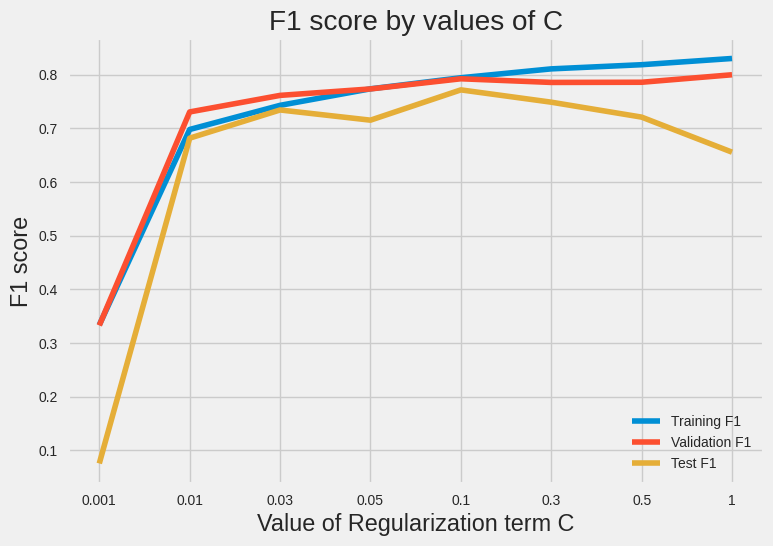

In [82]:
plt.style.use("fivethirtyeight")

plt.plot(listt_index,train_perf_hist_svm,label='Training F1')#
plt.plot(listt_index,valid_perf_hist_svm,label='Validation F1')
plt.plot(listt_index,test_perf_hist_svm,label='Test F1')
plt.xlabel('Value of Regularization term C')
plt.ylabel('F1 score')
plt.legend(loc='lower right')
plt.title('F1 score by values of C')

plt.show()

In [83]:
svm_model = sklearn.svm.SVC(C=0.5,kernel='rbf',random_state=40)
svm_model.fit(X_train_re,y_train_re)

y_pred_train_svm = svm_model.predict(X_train_re)
y_pred_valid_svm = svm_model.predict(X_valid_re)

print('F1 Score on Train:',f1_score(y_train_re,y_pred_train_svm,average='macro'))
print('F1 Score on Valid:',f1_score(y_valid_re,y_pred_valid_svm,average='macro'))

F1 Score on Train: 0.8184515726938351
F1 Score on Valid: 0.7857359176256814


In [84]:
y_pred_test_svm = svm_model.predict(X_test)

print('F1 on Test: ', f1_score(y_test,y_pred_test_svm,average='macro'))

F1 on Test:  0.7207792207792207


In [85]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_test_svm,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_test_svm)
print(report)

Confusion Matrix: [[145  13]
 [  5   9]]
---------------
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       158
           1       0.41      0.64      0.50        14

    accuracy                           0.90       172
   macro avg       0.69      0.78      0.72       172
weighted avg       0.92      0.90      0.91       172



In [87]:
# (Oversampling not applied on test set)
y_test.value_counts()

0    158
1     14
Name: Class, dtype: int64

[Text(0.5, 9.222222222222195, 'Predictions'),
 Text(34.72222222222222, 0.5, 'Actual values')]

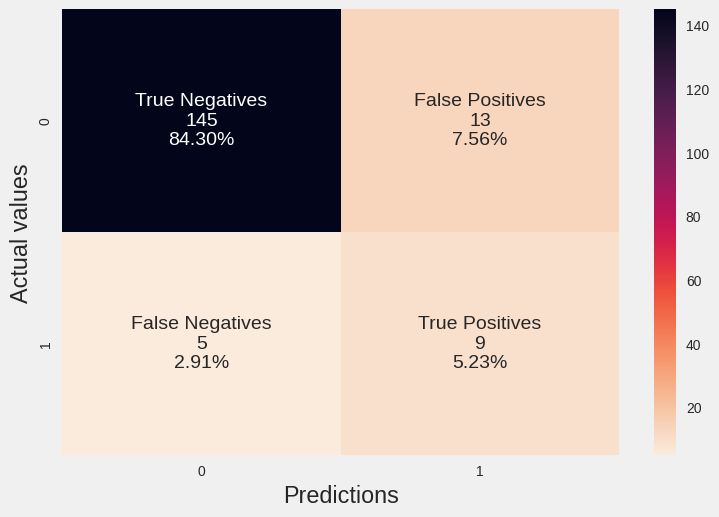

In [86]:
import seaborn as sns

group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten() / np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='rocket_r')
ax.set(xlabel="Predictions",ylabel="Actual values")

# OTHER FEATURES SELECT APPROACHES

## Random Feature Elimination (RFE)

In [92]:
# TRAIN VAL TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,shuffle=True,stratify=y,random_state=42)


# OVER SAMPLING
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train,y_train = smote.fit_resample(X_train,y_train)


X_train_re,X_valid_re,y_train_re,y_valid_re = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,shuffle=True,random_state=42)

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import sklearn.svm

#clf = sklearn.svm.SVC(C=0.1,kernel='linear',random_state=40)
clf = LogisticRegression()

# Amount of features to keep
n_features_to_select = 500

# Create RFE object and fit the model
rfe = RFE(estimator=clf, n_features_to_select=n_features_to_select)
rfe.fit(X_train_re, y_train_re)

# Get the selected features
selected_features = X.columns[rfe.support_]


print(selected_features)

Index(['feature_3', 'feature_4', 'feature_7', 'feature_12', 'feature_15',
       'feature_16', 'feature_19', 'feature_21', 'feature_22', 'feature_27',
       ...
       'feature_1538', 'feature_1540', 'feature_1543', 'feature_1545',
       'feature_1547', 'feature_1548', 'feature_1549', 'feature_1552',
       'feature_1553', 'feature_1555'],
      dtype='object', length=500)


In [95]:
print(X_train_re[selected_features].shape)

(2545, 500)


In [96]:
svm_model = sklearn.svm.SVC(C=0.1,kernel='rbf',random_state=40)

# Train the classifier with the selected features
svm_model.fit(X_train_re[selected_features], y_train_re)

# Make predictions on the test set
y_pred_rfe = svm_model.predict(X_test[selected_features])

# Calculate accuracy
accuracy = f1_score(y_test, y_pred_rfe,average="macro")
print("F1 Score after RFE with ",n_features_to_select," features:",accuracy)

F1 Score after RFE with  500  features: 0.5922910440070082


In [97]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_rfe,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_rfe)
print(report)

Confusion Matrix: [[145  13]
 [ 10   4]]
---------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       158
           1       0.24      0.29      0.26        14

    accuracy                           0.87       172
   macro avg       0.59      0.60      0.59       172
weighted avg       0.88      0.87      0.87       172



## Variance thresholding

In [103]:
from sklearn.feature_selection import VarianceThreshold
import sklearn.svm

clf = sklearn.svm.SVC(C=0.1,kernel='rbf',random_state=40)


# Specify the threshold for variance
threshold_value = 0.01

# Create VarianceThreshold object and fit the model
variance_selector = VarianceThreshold(threshold=threshold_value)
X_train_selected = variance_selector.fit_transform(X_train)

# Get the selected features indices
selected_features_indices = variance_selector.get_support(indices=True)

# Filter the testing set with the selected features
X_test_selected = X_test.iloc[:, selected_features_indices]

# Train the classifier with the selected features
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_var = clf.predict(X_test_selected)

# Calculate accuracy
score = f1_score(y_test, y_pred_var,average="macro")
print("-----------------")
print("F1 score on Test set  (selected features):", score)

-----------------
F1 score on Test set  (selected features): 0.653867825806971


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [104]:
X_train_selected.shape

(2828, 214)

In [105]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_var,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_var)
print(report)

Confusion Matrix: [[139  19]
 [  6   8]]
---------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       158
           1       0.30      0.57      0.39        14

    accuracy                           0.85       172
   macro avg       0.63      0.73      0.65       172
weighted avg       0.90      0.85      0.87       172

